## CNN for MNIST

AhmadReza Nopoush    |  id:610301194

At first we import the libraries we need:

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPooling2D, Resizing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np

Now, we load MNIST data and present a picture from each class

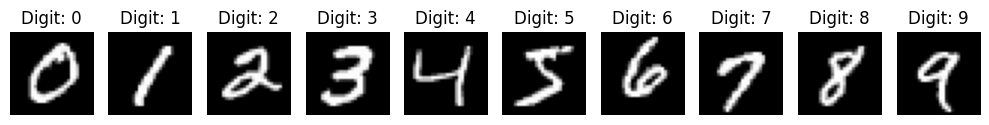

In [2]:
#load MNIST data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = np.repeat(X_train,3, axis=-1)
X_test = np.repeat(X_test,3, axis=-1)

#Create a figure
plt.figure(figsize=(10, 5))

#Display one example of each digit (0-9)
for i in range(10):
    #Find the first image of each digit in dataset
    idx = np.where(Y_train == i)[0][0]
    img = X_train[idx]

    #Ploting the image
    plt.subplot(1, 10, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Digit: {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Now, we define the model as below.
about the parameters of second convolutional layer, from testing several times we found that setting  `kernel_size=(3, 3)` and `filters=20` is better than `kernel_size=(2, 2)` and `filters=30`.

In [3]:
#Define the model
model = Sequential()

#Resizing
model.add(Resizing(32, 32, input_shape=(28, 28, 3)))

#First convolutional layer with batch normalization and dropout
model.add(Conv2D(filters=10, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))


#Second convolutional layer with batch normalization and dropout
model.add(Conv2D(filters=20, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))

# Flatten the output from the convolutional layers
model.add(Flatten())

#First fully connected layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(50, activation='relu'))

#Second fully connected layer with 10 output units for classification
model.add(Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 10)        280       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 10)        40        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 10)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 20)        1

Now we train our model on train data.

 note that the validation data is determined with ` validation_split=0.2`.

In [4]:
#normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

#Convert labels to categorical format
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

#Train the model
history = model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 57s 37ms/step - loss: 0.8191 - accuracy: 0.7344 - val_loss: 0.1932 - val_accuracy: 0.9433
Epoch 2/15
1500/1500 [==============================] - 53s 35ms/step - loss: 0.3223 - accuracy: 0.9038 - val_loss: 0.0948 - val_accuracy: 0.9718
Epoch 3/15
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2529 - accuracy: 0.9259 - val_loss: 0.0830 - val_accuracy: 0.9773
Epoch 4/15
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2132 - accuracy: 0.9368 - val_loss: 0.0978 - val_accuracy: 0.9696
Epoch 5/15
1500/1500 [==============================] - 54s 36ms/step - loss: 0.1952 - accuracy: 0.9422 - val_loss: 0.0718 - val_accuracy: 0.9797
Epoch 6/15
1500/1500 [==============================] - 52s 35ms/step - loss: 0.1838 - accuracy: 0.9460 - val_loss: 0.0598 - val_accuracy: 0.9843
Epoch 7/15
1500/1500 [==============================] - 54s 36ms/step - loss: 0.1801 - accuracy: 0.9479 - val_loss: 0.0586 -

Now we compute the accuracy of model on test data. then we plot the confusion matrix

313/313 [==============================] - 3s 10ms/step - loss: 0.0519 - accuracy: 0.9847
Test accuracy: 0.9847000241279602
313/313 [==============================] - 3s 10ms/step


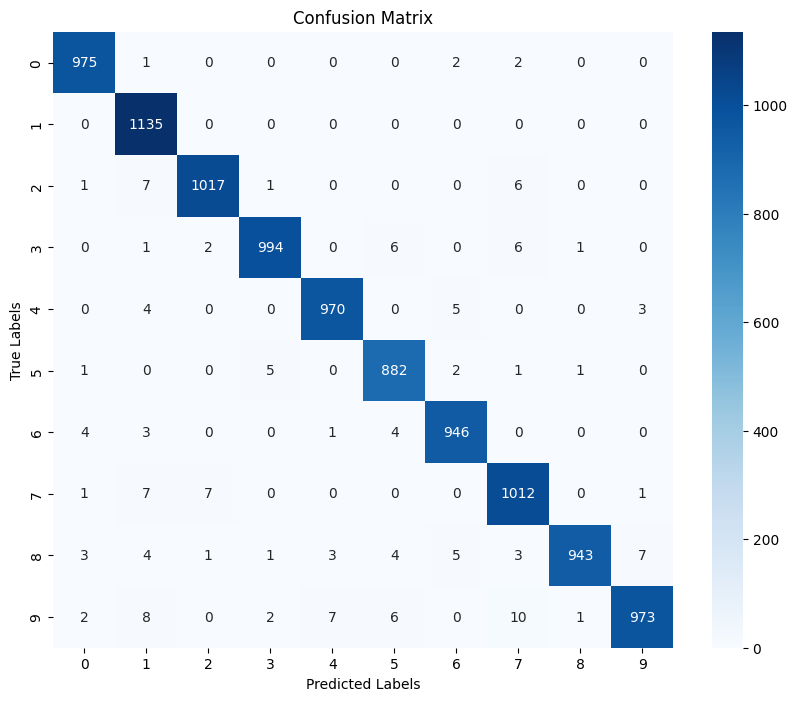

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc}')

# Predict the labels for the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Now, we plot the changes of accuracy and loss in training through epochs

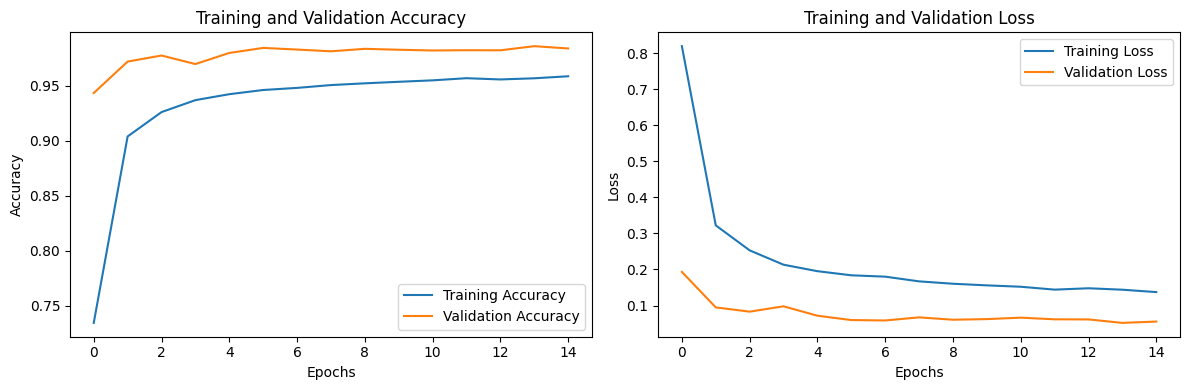

In [8]:
# Plot the training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Concolusion
We were able to design a network that shows the desired output with very high accuracy.